In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Explore Data,and using a native BenchMark to evaluation your performance

In [2]:
df_train=pd.read_csv('../AI_database/trips/taxi-train.csv')
df_dev=pd.read_csv('../AI_database/trips/taxi-valid.csv')
print(df_train.shape)
print(df_dev.shape)

(7645, 7)
(1814, 7)


In [3]:
df_train.head()

,fare_amount,pickuplon,pickuplat,dropofflon,dropofflat,passengers,key
0,2.5,-73.988954,40.758612,-73.952118,40.776227,2.0,0
1,2.5,-73.971783,40.763727,-73.971769,40.763768,2.0,1
2,3.0,-73.976258,40.786085,-73.974417,40.788517,2.0,2
3,3.0,-73.990085,40.746602,-73.993129,40.747650,2.0,3
4,3.5,-73.985820,40.744768,-73.978803,40.752505,2.0,4


In [4]:
df_train.describe()

,fare_amount,pickuplon,pickuplat,dropofflon,dropofflat,passengers,key
count,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000
mean,11.334336,-73.974781,40.751739,-73.974658,40.751199,1.685808,3822.000000
std,9.932482,0.040159,0.030237,0.038853,0.033383,1.306172,2207.065737
min,2.500000,-74.258183,40.452290,-74.260472,40.417750,1.000000,0.000000
25%,6.000000,-73.992035,40.737686,-73.991711,40.735762,1.000000,1911.000000
50%,8.500000,-73.981898,40.754447,-73.980689,40.753857,1.000000,3822.000000
75%,12.500000,-73.968408,40.768215,-73.965827,40.768205,2.000000,5733.000000
max,179.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,7644.000000


In [5]:
#defina a metrics, Root of mean square error
def rmse(y,ypred):
    return np.sqrt(np.mean((y-ypred)**2))
def distance_between(lat1, lon1, lat2, lon2):
# Haversine formula to compute distance "as the crow flies".  Taxis can't fly of course.
    dist = np.degrees(np.arccos(np.sin(np.radians(lat1)) * np.sin(np.radians(lat2)) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * 
                              np.cos(np.radians(lon2 - lon1)))) * 60 * 1.515 * 1.609344
    return dist
def estimate_distance(df):
    return distance_between(df['pickuplat'], df['pickuplon'], df['dropofflat'], df['dropofflon'])

In [6]:
df_train['estimate_distance']=estimate_distance(df_train)
df_dev['estimate_distance']=estimate_distance(df_dev)
df_train.describe()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys


,fare_amount,pickuplon,pickuplat,dropofflon,dropofflat,passengers,key,estimate_distance
count,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7644.000000
mean,11.334336,-73.974781,40.751739,-73.974658,40.751199,1.685808,3822.000000,4.331916
std,9.932482,0.040159,0.030237,0.038853,0.033383,1.306172,2207.065737,4.929931
min,2.500000,-74.258183,40.452290,-74.260472,40.417750,1.000000,0.000000,0.000000
25%,6.000000,-73.992035,40.737686,-73.991711,40.735762,1.000000,1911.000000,1.652052
50%,8.500000,-73.981898,40.754447,-73.980689,40.753857,1.000000,3822.000000,2.803383
75%,12.500000,-73.968408,40.768215,-73.965827,40.768205,2.000000,5733.000000,5.070736
max,179.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,7644.000000,126.783083


In [7]:
# df_train=df_train[df_train['estimate_distance']>0]
# df_dev=df_dev[df_dev['estimate_distance']>0]

## compute native benchmark

In [8]:
alpha1=df_train['fare_amount'].mean()/df_train['estimate_distance'].mean()
alpha2=(df_train['fare_amount']/df_train['estimate_distance']).mean()
alpha3=(df_train['fare_amount']*df_train['estimate_distance']).sum()/(df_train['estimate_distance']**2).sum()

In [9]:
(df_train['fare_amount']/df_train['estimate_distance']).describe()

count    7644.000000
mean             inf
std              NaN
min         0.183407
25%         2.266512
50%         2.938645
75%         3.912115
max              inf
dtype: float64

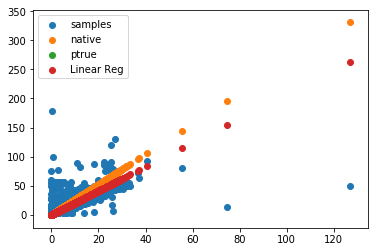

In [10]:
samples=df_train#.sample(n=1000,random_state=0)
x=samples['estimate_distance']
y=samples['fare_amount']
plt.scatter(x,y)
plt.scatter(x,alpha1*x)
plt.scatter(x,alpha2*x)
plt.scatter(x,alpha3*x)
# df_train.plot(x='estimate_distance',y='fare_amount',kind='scatter')
plt.legend(['samples','native','ptrue','Linear Reg'])

## Evaluation On Validation Set

In [11]:
error1=rmse(df_dev['fare_amount'],df_dev['estimate_distance']*alpha1)
error2=rmse(df_dev['fare_amount'],df_dev['estimate_distance']*alpha2)
error3=rmse(df_dev['fare_amount'],df_dev['estimate_distance']*alpha3)
print('native rmse: {}'.format(error1))
print('ptrue rmse: {}'.format(error2))
print('Ls rmse: {}'.format(error3))

native rmse: 9.354082608239274
ptrue rmse: inf
Ls rmse: 7.633352366432489


## Test On artifial dataset

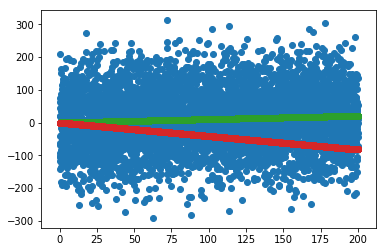

In [71]:
a,n=.1,5000
t=np.linspace(.1,200,n)
noise=np.random.randn(n)*90
f=a*t+noise
plt.scatter(t,f)
ls_a=np.sum(f*t)/np.sum(t*t)
plt.scatter(t,ls_a*t)
ls_b=(f/t).mean()
plt.scatter(t,ls_a*t)
plt.scatter(t,ls_b*t)

In [72]:
ls_a

0.10379805734335758

In [73]:
ls_b

-0.4117347833432561